In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
import time

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import seaborn as sns
# sns.set()


# Ignore useless warnings (see SciPy issue #5998)
# import warnings
# warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris(as_frame=True)
X = iris.data.values
y = iris.target.values

iris.frame.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


# PCA (Data Compression) [[3.1.]](#resources)[[3.2.]](#resources)

Certain type of unsupervised learning algorithm used for dimensionality reduction, in another hand we can say data compression.

## Table of content
1. [Motivation](#motivation)
2. [PCA](#pca)
3. [PCA Algorithm](#pca-algorithm)
4. [Data compression](#data-compression)
5. [Best k-dim](#best-k-dim)
6. [Bad use of PCA](#bad-use-of-pca)
7. [Summary](#summary)
8. [Resources](#resources)

## Motivation

1. Dimension reduction to speed learning algorithm.
2. Visualize dataset which has dimensionality bigger than 3D.
3. Memory space reduction.

## PCA

PCA do dimensionality reduction, for ex. let's take a dataset with two features (it's 2D) and want to reduce the number of features into one feature (1D), so the PCA try to find the best direction of vector (in this case 1D vector $u^{(i)} \in R^1$) where the distance between each point and the projected one into the vector is smallest, in another words PCA try to  minimize the projection error.

> average squerd projection error = $\frac{1}{m} \sum^{m}_{i=1}  \parallel  x^{(i)} - x^{(i)}_{approx} \parallel^{2} $

<h6>img [5.1.]</h6>
<img src=".\imgs\pca-example-1D-of-2D.png" width="256" height="256">


PCA in general let say we have a dataset $\{ x^{(1)}, x^{(2)}, ... x^{(m)} \}$, where $x^{(i)} \in R^n$ as result of applying dimensionality reduction to the dataset we get a lower dimensional dataset $\{z^{(1)}, z^{(2)}, ..., z^{(m)}\}$, where $z^{(i)} \in R^k$ and the $k \leq n$. 

1. $n$ the old dimension, could be 2, 3, ... big number.
2. $k$ the new dimension, could be 1, 2, 3, 4, ..., depend what user we want.
3. $x^{(i)}$ the orginal (old) value.
4. $z^{(i)}$ the new value, with new dimension.

> Keep in mind the new value which we get $z^{(i)}$ it's not the original one just new generated based on PCA methodology.

## PCA Algorithm

Reduce data from n-dim to k-dim

* Data processing 
1. Training set: $\{ x^{(1)}, x^{(2)}, ..., x^{(m)}\}$
2. Mean normalization:

> $\mu_j = \frac{1}{m} \sum^{m}_{i=1} x^{(i)}_{j} $

> then repleace each $x^{(i)}_{j} $ with $x_{j} - \mu_{j}$

3. feature scaling, if the features have different scales.

* coveriance matrix, is $n*n$ matrix

> $\sum = \frac{1}{m} \sum^{n}_{i=1} (x^{(i)})(x^{(i)})^{T}$

> vector representation : $sigma = (1/m) * X^{T} * X$
<!-- > $U \in R^{n*n}$ -->

in matlab `[U,S,V] = svd(Sigma)`, in numpy `u, s, vh = np.linalg.svd(Sigma)`, svd is singular value decomposition, we need the `U` matrix which are $n*n$ matrix contains the $u^{(i)}$, each column of the matrix represent a k-dimensions.

* reduce dimension, by use first k-number of column where k equal to the desire dimension then multiply with the dataset.

> $z^{(i)} = U^T * x^{(i)}$

1. $U^{T}_{k*n}$
<br>
<br>
2. $x^{(i)}_{n*1}$
<br>
<br>
3. $z^{(i)}_{k*1}$

### Ex.1.

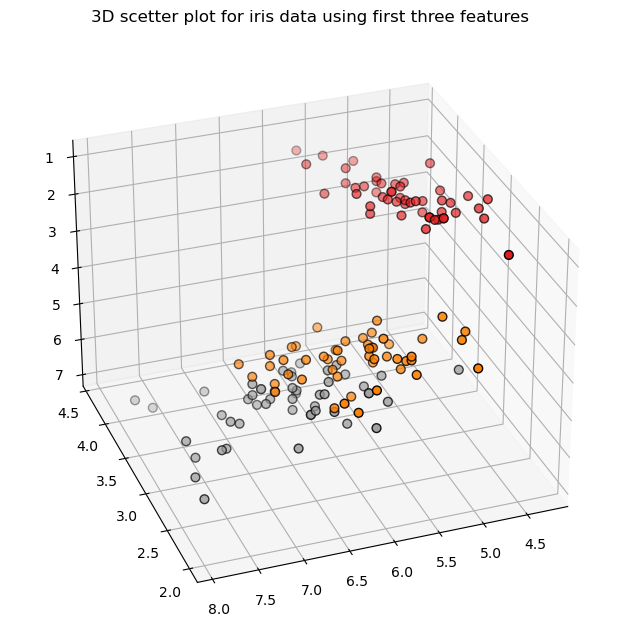

In [14]:
# ...
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = Axes3D(fig, elev=-150, azim=110)

# ...
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("3D scetter plot for iris data using first three features")

plt.show();

In [15]:
X_reduced_2d = PCA(n_components=2).fit_transform(X)
X_reduced_2d[:2]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123]])

In [16]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

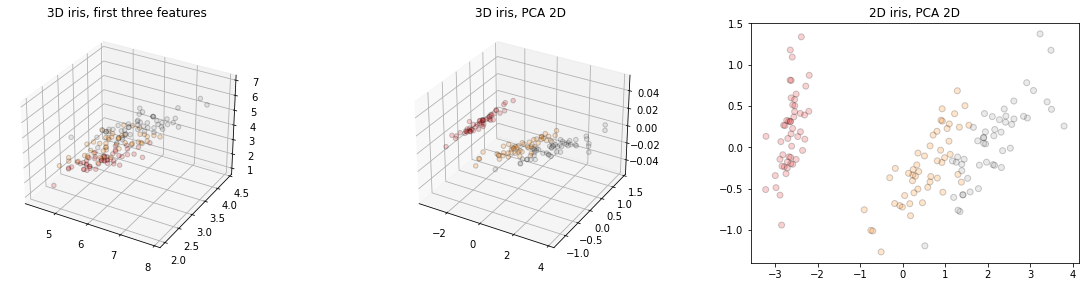

In [17]:
# import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (20,15))


# ...
ax1 = fig.add_subplot(3,3,1, projection='3d')
ax1.set_title("3D iris, first three features")
ax1.scatter(X[:, 0], X[:, 1],  X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=.2)


ax2 = fig.add_subplot(3,3,2, projection='3d')
ax2.set_title("3D iris, PCA 2D")
ax2.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], zs=0, c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=.2)


ax3 = fig.add_subplot(3,3,3)
ax3.set_title("2D iris, PCA 2D")
ax3.scatter(X_reduced_2d[:, 0], X_reduced_2d[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', alpha=.2)


plt.show();

<img src="./imgs/1.png" alt="1.png">

### Ex.2.

In [91]:
# u, s, vh = np.linalg.svd()

a = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
])
a.shape

(3, 2)

In [92]:
u, s, vh = np.linalg.svd(a)
u

array([[-0.2298477 ,  0.88346102,  0.40824829],
       [-0.52474482,  0.24078249, -0.81649658],
       [-0.81964194, -0.40189603,  0.40824829]])

In [93]:
a_reduce = np.dot(u[:, :1].T, a)
a_reduce.shape

(1, 2)

In [94]:
a_reduce

array([[-5.90229186, -7.47652631]])

In [95]:
u[:,1].shape

(3,)

## Data compression

PCA used also fro data compression for ex. from 1000 dim into 100 dim and then back to original size of dim. 

> $Z \in R^1  \rightarrow x \in R^{2} $

> $x_{approx} = U_{reduce} * z$ 

> $U_{n*k}$

> $z_{k*1}$

In [104]:
X_2 =  np.array([
    [1, 2],
    [3, 4],
    [5, 6],
])

X[:,:2].shape

(150, 2)

In [106]:
X[:2,:2]

array([[5.1, 3.5],
       [4.9, 3. ]])

In [102]:
pca_ex_2 = PCA(n_components=1)
X_2_r = pca_ex_2.fit_transform(X[:,:2])
X_2_r[:2]

array([[-0.7781478 ],
       [-0.93509031]])

In [107]:
X_2_aprox = pca_ex_2.inverse_transform(X_2_r)
X_2_aprox[:2]

array([[5.06798038, 3.12322557],
       [4.91160154, 3.1365152 ]])

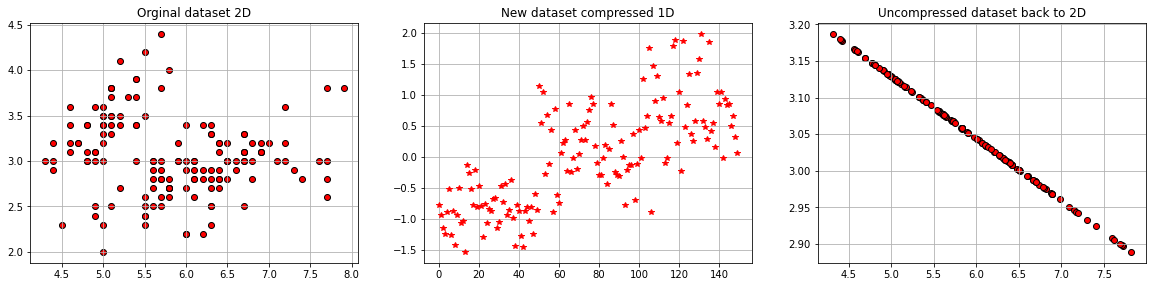

In [108]:
# import matplotlib.gridspec as gridspec
fig = plt.figure(figsize = (20,15))


# ...
ax1 = fig.add_subplot(3,3,1)
ax1.set_title("Orginal dataset 2D")
ax1.scatter(X[:, 0], X[:, 1], c='r', edgecolor='k')
ax1.grid()


ax2 = fig.add_subplot(3,3,2)
ax2.set_title("New dataset compressed 1D")
ax2.plot(X_2_r[:, 0], '*', c='r')
ax2.grid()


ax3 = fig.add_subplot(3,3,3)
ax3.set_title("Uncompressed dataset back to 2D")
ax3.scatter(X_2_aprox[:, 0], X_2_aprox[:, 1], c='r', edgecolor='k')
ax3.grid()

plt.show();

## Best k-dim

### First way
* Average squerd projection error 
> $\frac{1}{m} \sum^{m}_{i=1}  \parallel  x^{(i)} - x^{(i)}_{approx} \parallel^{2} $
* Total variation in the data set
> $\frac{1}{m} \sum^{m}_{i=1}  \parallel  x^{(i)} \parallel^{2} $

Typically, choose k to be samllest value of equation below :
> $ \frac
{\frac{1}{m} \sum^{m}_{i=1}  \parallel  x^{(i)} - x^{(i)}_{approx} \parallel^{2} }
{\frac{1}{m} \sum^{m}_{i=1}  \parallel  x^{(i)} \parallel^{2}}
\leq 0.01
$

in another word **99% of variance is retained**

### Second way

`
u, s, vh = np.linalg.svd(a)
`

$
1 - \frac{\sum^{k}_{i=1} S_{ii}} {\sum^{n}_{i=1} S_{ii}} \leq 0.01
$

in another word **99% of variance is retained**


## Bad use of PCA

Use PCA to prevent the overfitting (maybe fewer features less likely to overfit), this idea not good and not work, maybe it work  but `better use regularization` insted, because when reduce dim, throw away some data (information, correlations).

<h6>img [5.2.]</h6>
<img src="./imgs/bad-use-pca.png">

## Summary
1. PCA is unsupervised algorithm.
2. PCA need feature to be scaled to comparable range of values.
3. PCA try to find a lower dimensional surface into which to project the data, by minimize this squared projection erro.
4. PCA try to minimize the square distance between each point and the location of where it gets projected.
5. PCA used for data compression when you want back to original dim, the new value not equal the original it's  approximated
6. In PCA language I chose `k` that keep  99% of variance was retained, this way of talk is better than saying I use `3 k`.
7. PCA `should be defiend only` on the training set. This PCA can be used to reduce cross validation set and test set.
8. PCA not used to prevent overfetting, use regularization is better.

## Resources

### Books
0. [[1.0.] ...](#)

### Papers
0. [[2.0.] ...](#)

### Web
0. [[3.0.] ...](#)
1. [[3.1.] Machine Learning > Week 8 > PCA](https://www.coursera.org/learn/machine-learning/lecture/GBFTt/principal-component-analysis-problem-formulation)
2. [[3.2.] Everything you did and didn't know about PCA](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/)

### Books
0. [[4.0.] ...](#)

### Images
0. [[5.0] ...](#)
1. [[5.1.] Dimensionality Reduction and Principal Component Analysis](https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=Lectures.PCA)
2. [[5.2.] advice-for-applying-pca](https://www.coursera.org/learn/machine-learning/lecture/RBqQl/advice-for-applying-pca)

### Const
1. [[6.0.] jupyter-notebook math symboles.](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html#The-Lorenz-Equations)
2. [[6.1.] Writing Math Equations in Jupyter Notebook: A Naive Introduction](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)
3. [[6.2.] Writing Mathematical Expressions with LaTeX](https://link.springer.com/content/pdf/bbm%3A978-1-4842-3913-1%2F1.pdf)

<!--
https://www.google.com/search?q=singular+value+decomposition.&source=lmns&bih=637&biw=1294&hl=en&sa=X&ved=2ahUKEwiiudj-o__qAhXFxCoKHcn9AnwQ_AUoAHoECAEQAA


-->

## TODO

1. [Why is it a good practice in machine learning to normalize features to zero mean and unit variance?](https://www.quora.com/Why-is-it-a-good-practice-in-machine-learning-to-normalize-features-to-zero-mean-and-unit-variance)

In [85]:
a = np.array([1, 2, 3 , 4])
a

array([1, 2, 3, 4])

In [86]:
m_ = np.mean(a)
m_

2.5

In [87]:
mx = np.max(a)
mx

4

In [88]:
a2 = a - m_
a2

array([-1.5, -0.5,  0.5,  1.5])

In [89]:
np.mean(a2)

0.0

In [90]:
a2 = a2 / mx
a2

array([-0.375, -0.125,  0.125,  0.375])

In [ ]:
np.mean(a2)